# Understanding recurrent neural networks

This notebook contains the code samples found in Chapter 6, Section 2 of [Deep Learning with Python](https://www.manning.com/books/deep-learning-with-python?a_aid=keras&a_bid=76564dff). Note that the original text features far more content, in particular further explanations and figures: in this notebook, you will only find source code and related comments.

---

[...]

## A first recurrent layer in Keras

The process we just naively implemented in Numpy corresponds to an actual Keras layer: the `SimpleRNN` layer:


In [1]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

Now let's try to use such a model on the IMDB movie review classification problem. First, let's preprocess the data:

In [3]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000  # number of words to consider as features
maxlen = 500  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [4]:
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

In [5]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 322113 (1.23 MB)
Trainable params: 322113 (1.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Let's train a simple recurrent network using an `Embedding` layer and a `SimpleRNN` layer:

In [3]:
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 14s 82ms/step - loss: 0.6565 - acc: 0.5954 - val_loss: 0.4992 - val_acc: 0.7640
Epoch 2/10
157/157 [==============================] - 16s 102ms/step - loss: 0.4326 - acc: 0.8098 - val_loss: 0.4464 - val_acc: 0.7976
Epoch 3/10
157/157 [==============================] - 18s 113ms/step - loss: 0.3179 - acc: 0.8723 - val_loss: 0.3598 - val_acc: 0.8504
Epoch 4/10
157/157 [==============================] - 15s 98ms/step - loss: 0.2488 - acc: 0.9043 - val_loss: 0.3604 - val_acc: 0.8504
Epoch 5/10
157/157 [==============================] - 16s 104ms/step - loss: 0.1916 - acc: 0.9277 - val_loss: 0.5146 - val_acc: 0.8222
Epoch 6/10
157/157 [==============================] - 16s 103ms/step - loss: 0.1365 - acc: 0.9546 - val_loss: 0.5332 - val_acc: 0.7772
Epoch 7/10
157/157 [==============================] - 18s 115ms/step - loss: 0.0892 - acc: 0.9707 - val_loss: 0.4443 - val_acc: 0.8478
Epoch 8/10
157/157 [==============================] - 21s

Let's display the training and validation loss and accuracy:

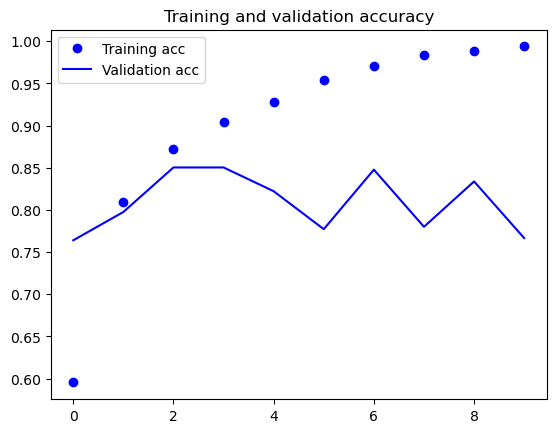

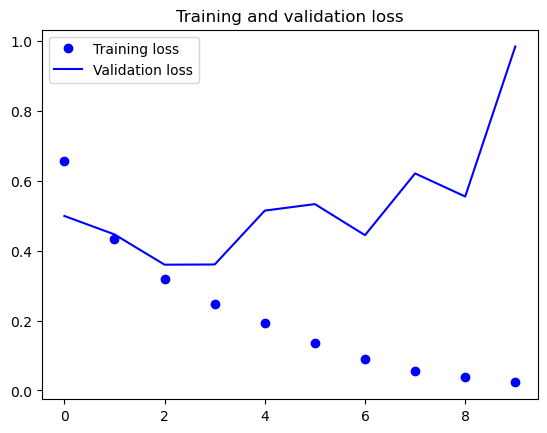

In [4]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

As a reminder, in chapter 3, our very first naive approach to this very dataset got us to 88% test accuracy. Unfortunately, our small
recurrent network doesn't perform very well at all compared to this baseline (only up to 85% validation accuracy). Part of the problem is
that our inputs only consider the first 500 words rather the full sequences --
hence our RNN has access to less information than our earlier baseline model. The remainder of the problem is simply that `SimpleRNN` isn't very good at processing long sequences, like text. Other types of recurrent layers perform much better. Let's take a look at some
more advanced layers.

[...]

## A concrete LSTM example in Keras

Now let's switch to more practical concerns: we will set up a model using a LSTM layer and train it on the IMDB data. Here's the network,
similar to the one with `SimpleRNN` that we just presented. We only specify the output dimensionality of the LSTM layer, and leave every
other argument (there are lots) to the Keras defaults. Keras has good defaults, and things will almost always "just work" without you
having to spend time tuning parameters by hand.

In [5]:
from keras.layers import LSTM

model1 = Sequential()
model1.add(Embedding(max_features, 32))
model1.add(LSTM(32))
model1.add(Dense(1, activation='sigmoid'))

model1.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history1 = model1.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 56s 336ms/step - loss: 0.6032 - acc: 0.6659 - val_loss: 0.4216 - val_acc: 0.8316
Epoch 2/10
157/157 [==============================] - 55s 349ms/step - loss: 0.3572 - acc: 0.8519 - val_loss: 0.3075 - val_acc: 0.8750
Epoch 3/10
157/157 [==============================] - 55s 348ms/step - loss: 0.2679 - acc: 0.8954 - val_loss: 0.3476 - val_acc: 0.8488
Epoch 4/10
157/157 [==============================] - 54s 342ms/step - loss: 0.2287 - acc: 0.9141 - val_loss: 0.3431 - val_acc: 0.8542
Epoch 5/10
157/157 [==============================] - 55s 352ms/step - loss: 0.2005 - acc: 0.9262 - val_loss: 0.3319 - val_acc: 0.8818
Epoch 6/10
157/157 [==============================] - 53s 339ms/step - loss: 0.1829 - acc: 0.9348 - val_loss: 0.3465 - val_acc: 0.8532
Epoch 7/10
157/157 [==============================] - 54s 342ms/step - loss: 0.1595 - acc: 0.9440 - val_loss: 0.2988 - val_acc: 0.8816
Epoch 8/10
157/157 [==============================] - 5

In [6]:
from keras.layers import LSTM

model1 = Sequential()
model1.add(Embedding(max_features, 32))
model1.add(LSTM(32))
model1.add(Dense(1, activation='sigmoid'))

In [7]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          320000    
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 328353 (1.25 MB)
Trainable params: 328353 (1.25 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


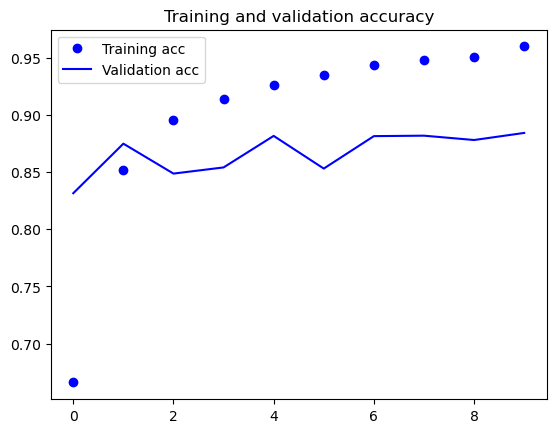

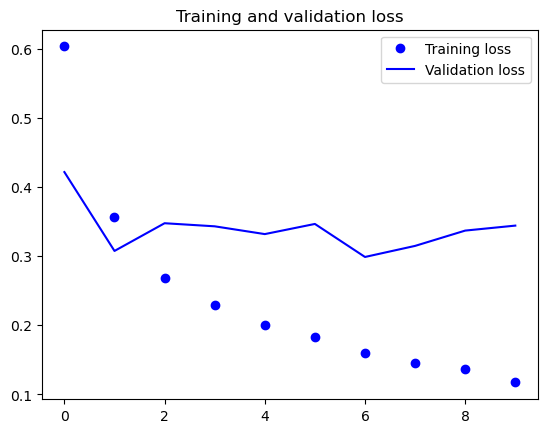

In [6]:
acc = history1.history['acc']
val_acc = history1.history['val_acc']
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [11]:
from sklearn.metrics import confusion_matrix

# Predict classes using the test set
y_pred = (model.predict(input_test) > 0.5).astype('int32')

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Extract true positives, true negatives, false positives, and false negatives
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

# Calculate accuracy, sensitivity (recall), and specificity
accuracy = (TP + TN) / (TP + TN + FP + FN)
sensitivity = TP / (TP + FN)  # Recall
specificity = TN / (TN + FP)

print(f'Accuracy: {accuracy:.4f}')
print(f'Sensitivity (Recall): {sensitivity:.4f}')
print(f'Specificity: {specificity:.4f}')

782/782 [==============================] - 21s 26ms/step
Accuracy: 0.7541
Sensitivity (Recall): 0.5530
Specificity: 0.9552


In [12]:
# Print the confusion matrix
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[11940   560]
 [ 5588  6912]]


In [15]:
from sklearn.metrics import confusion_matrix

# Predict classes using the test set
y_pred1 = (model1.predict(input_test) > 0.5).astype('int32')

# Calculate the confusion matrix
conf_matrix1 = confusion_matrix(y_test, y_pred1)

# Extract true positives, true negatives, false positives, and false negatives
TP = conf_matrix1[1, 1]
TN = conf_matrix1[0, 0]
FP = conf_matrix1[0, 1]
FN = conf_matrix1[1, 0]

# Calculate accuracy, sensitivity (recall), and specificity
accuracy1 = (TP + TN) / (TP + TN + FP + FN)
sensitivity1 = TP / (TP + FN)  # Recall
specificity1 = TN / (TN + FP)

print(f'Accuracy: {accuracy1:.4f}')
print(f'Sensitivity (Recall): {sensitivity1:.4f}')
print(f'Specificity: {specificity1:.4f}')

782/782 [==============================] - 26s 34ms/step
Accuracy: 0.8711
Sensitivity (Recall): 0.8534
Specificity: 0.8887


In [14]:
# Print the confusion matrix
print('Confusion Matrix:')
print(conf_matrix1)

Confusion Matrix:
[[11109  1391]
 [ 1832 10668]]
